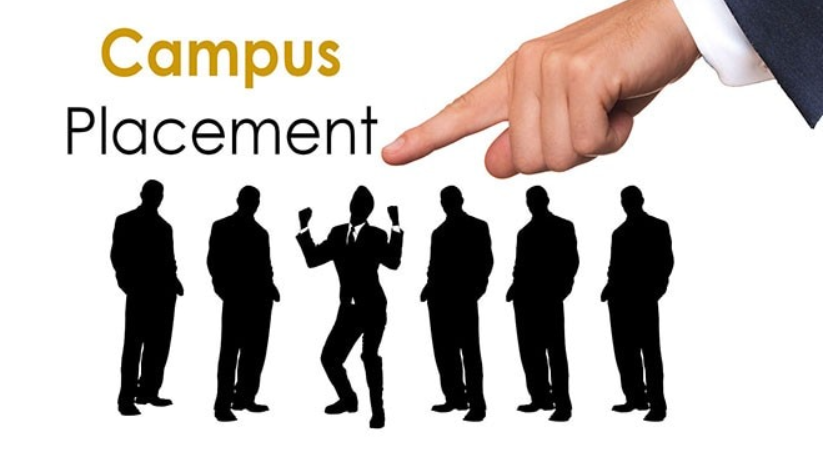

# Introduction  
## About the Dataset
This data set consists of Placement data of students in Jain University, Bangalore. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

# Problem Statement
**To predict whether or not a candidate will be placed(or employed) on the basis of his/her Secondary %, Higher Secondary %, Undergraduate Degree %, MBA % and Employability Test %**

# The Methodology
1. **Loading and Cleaning + Preprocessing the Data**
2. **Exploratory Data Analysis(EDA)**
    * Pairplot
    * Bubble Plot(s)
    * Tree Chart
    * Pie Chart
    * Histogram
    * Trendline
    * Violin Plot
    * Swarm Plot
3. **Predictive Modelling**
    * Logistic Regression
    * Decision Tree
    * Naive Bayes Classifier
    * Random Forest Classifier
    * Support Vector Machine(SVM) Classifier
    * Artificial Neural Network(ANN)


# Importing Relevant Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
sns.set()

# Loading the Data

In [ ]:
raw_csv_data = pd.read_csv('/content/Placement_Data_Full_Class (1).csv')
raw_csv_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
raw_csv_data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Salary Insights

Number of Students = 215

Mean Salary of Studens = 198702

Max Salary = 940000

Students with No Placement = 67

Marks Insights

Avg. SSC Percentage = 66.30

Avg. HSC Percentage = 66.33

Avg. Degree Percentage = 66.37

Avg. E-Test Percentage = 72.10

Avg. MBA Percentage = 62.27

# Preprocessing the Data

In [ ]:
df_comp = raw_csv_data.copy()

In [ ]:
df_comp.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df_comp.fillna(df_comp['salary'].mean(), inplace = True)

#### Dropping sl_no as it is an insignificant feature

In [ ]:
del df_comp['sl_no']

In [ ]:
df_comp

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


# using undersampling

In [ ]:
#checking for balance data
df_comp.value_counts('status')

status
Placed        148
Not Placed     67
dtype: int64

In [ ]:
mino_class=len(df_comp[df_comp['status']=='Not Placed'])
print(mino_class)

67


In [ ]:
majo_class_index=df_comp[df_comp['status']=='Placed'].index
print(majo_class_index)

Int64Index([  0,   1,   2,   4,   7,   8,  10,  11,  13,  15,
            ...
            202, 203, 204, 205, 207, 209, 210, 211, 212, 213],
           dtype='int64', length=148)


In [ ]:
mino_class_index=df_comp[df_comp['status']=='Not Placed'].index

In [ ]:
random_majority_indices=np.random.choice(majo_class_index,mino_class,replace=False)
len(random_majority_indices)

67

In [ ]:
under_sample_indices=np.concatenate([mino_class_index,random_majority_indices])
len(under_sample_indices)

134

In [ ]:
df=df_comp.loc[under_sample_indices]

In [ ]:
df.status.value_counts()

Placed        67
Not Placed    67
Name: status, dtype: int64

##after undersampling

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


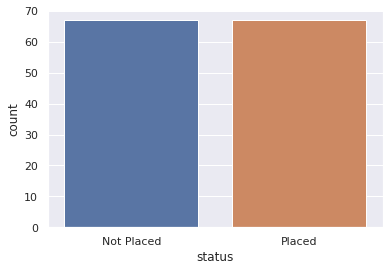

In [ ]:
sns.countplot(df.status)
sns.set(rc={'figure.figsize':(10,10)})

#Outliers


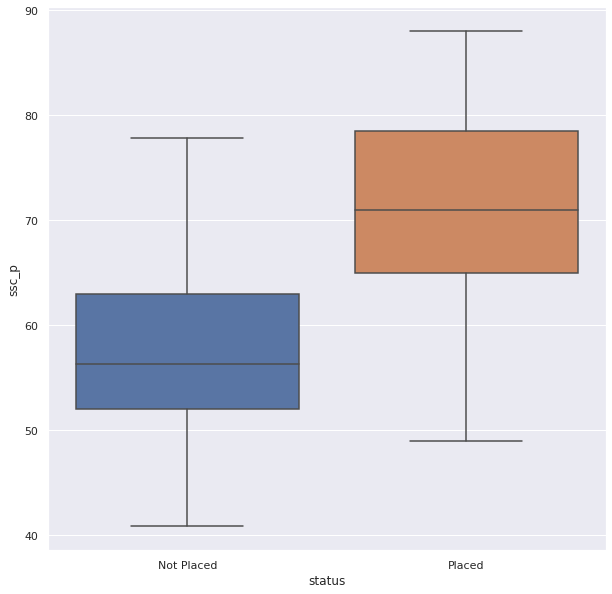

In [ ]:
sns.boxplot(x=df.status,y=df.ssc_p)
sns.set(rc={'figure.figsize':(10,10)})

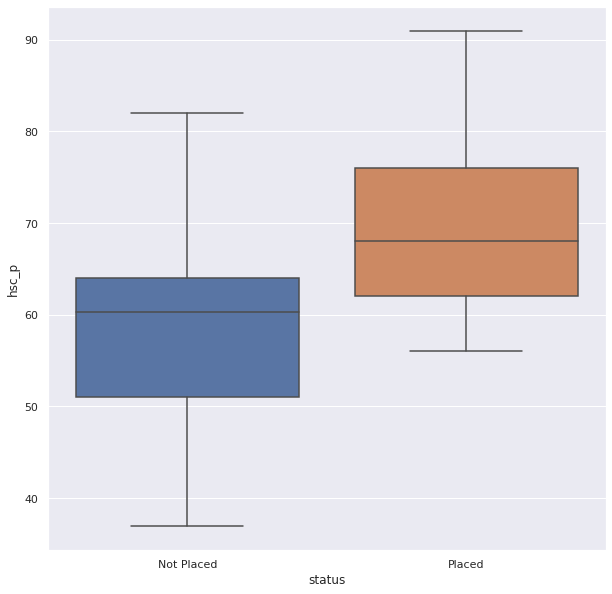

In [ ]:
sns.boxplot(x=df.status,y=df.hsc_p)
sns.set(rc={'figure.figsize':(10,10)})

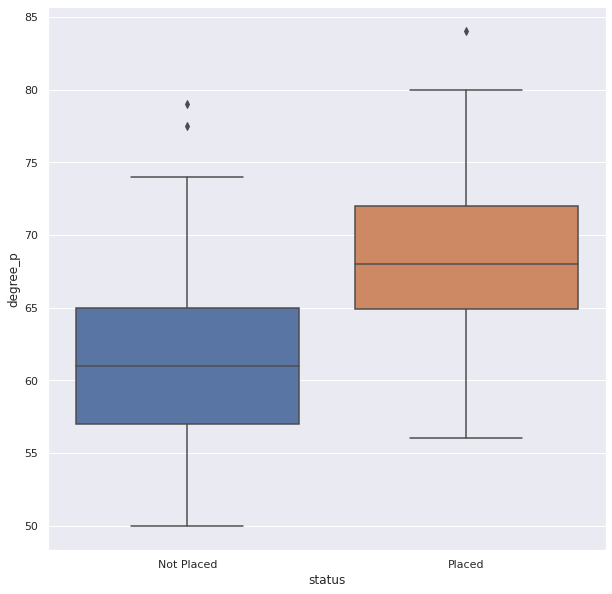

In [ ]:
sns.boxplot(x=df.status,y=df.degree_p)
sns.set(rc={'figure.figsize':(10,10)})

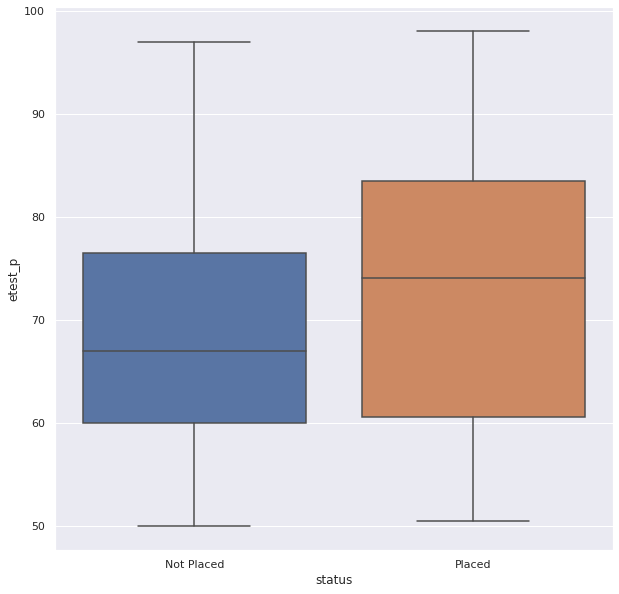

In [ ]:
sns.boxplot(x=df.status,y=df.etest_p)
sns.set(rc={'figure.figsize':(10,10)})

#OUTLIERS DETECTION AND REMOVAL

In [ ]:
def Outlier(df_comp):
    sorted(df_comp)
    Q1,Q3=np.percentile(df_comp,[25,75])
    IQR=Q3-Q1
    lower=Q1-(1.5*IQR)
    upper=Q3+(1.5*IQR)
    return lower,upper

##hsc_p

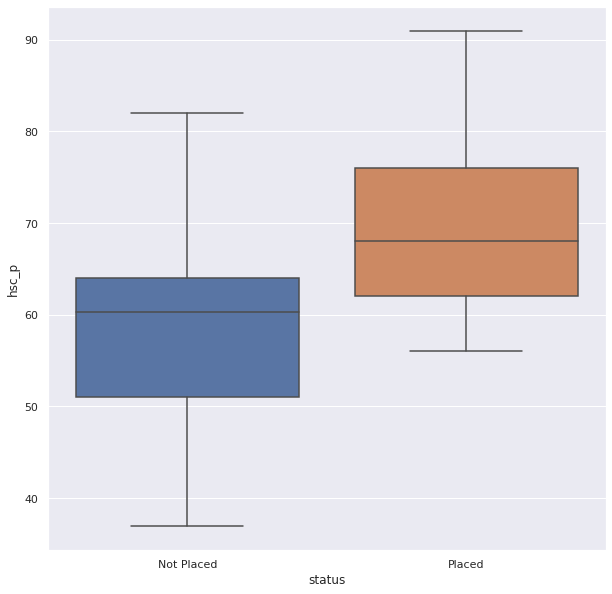

In [ ]:
sns.boxplot(x=df.status,y=df.hsc_p)
sns.set(rc={'figure.figsize':(10,10)})

In [ ]:
df.status.value_counts()

Placed        67
Not Placed    67
Name: status, dtype: int64

In [ ]:
lr,ur=Outlier(df[df.status == 'Placed'].hsc_p)
df.drop(df.index[(df.status == 'Placed')&(df.hsc_p < lr)],inplace=True)
df.drop(df.index[(df.status == 'Placed')&(df.hsc_p > ur)],inplace=True)
df.status.value_counts()

Placed        67
Not Placed    67
Name: status, dtype: int64

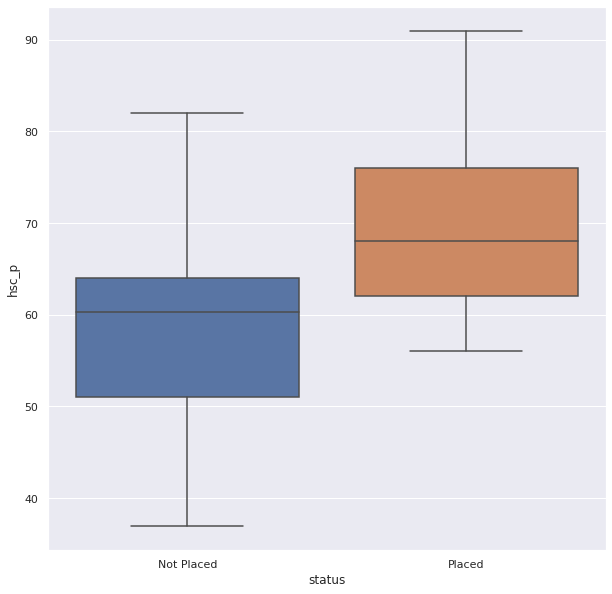

In [ ]:
sns.boxplot(x=df.status,y=df.hsc_p)
sns.set(rc={'figure.figsize':(10,10)})

##degree_p

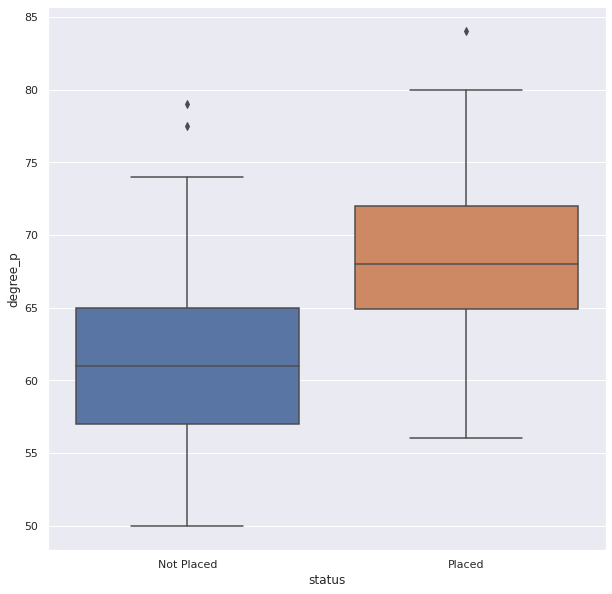

In [ ]:
sns.boxplot(x=df.status,y=df.degree_p)
sns.set(rc={'figure.figsize':(10,10)})

In [ ]:
df.status.value_counts()

Placed        67
Not Placed    67
Name: status, dtype: int64

In [ ]:
lr,ur=Outlier(df[df.status == 'Placed'].degree_p)
df.drop(df.index[(df.status == 'Placed')&(df.degree_p < lr)],inplace=True)
df.drop(df.index[(df.status == 'Placed')&(df.degree_p > ur)],inplace=True)
df.status.value_counts()

Not Placed    67
Placed        66
Name: status, dtype: int64

In [ ]:
lr,ur=Outlier(df[df.status == 'Not Placed'].degree_p)
df.drop(df.index[(df.status == 'Not Placed')&(df.degree_p < lr)],inplace=True)
df.drop(df.index[(df.status == 'Not Placed')&(df.degree_p > ur)],inplace=True)
df.status.value_counts()

Placed        66
Not Placed    65
Name: status, dtype: int64

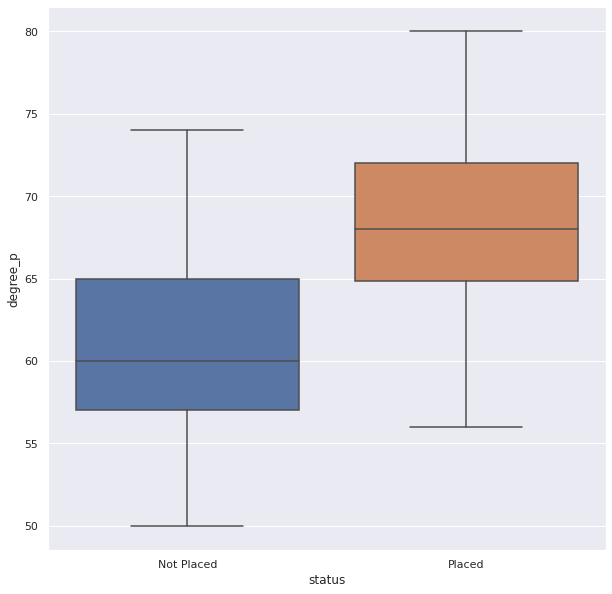

In [ ]:
sns.boxplot(x=df.status,y=df.degree_p)
sns.set(rc={'figure.figsize':(10,10)})

# Exploratory Data Analysis

## Count of categorical features- Count plot

Text(0.5, 1.0, 'Status of recruitment')

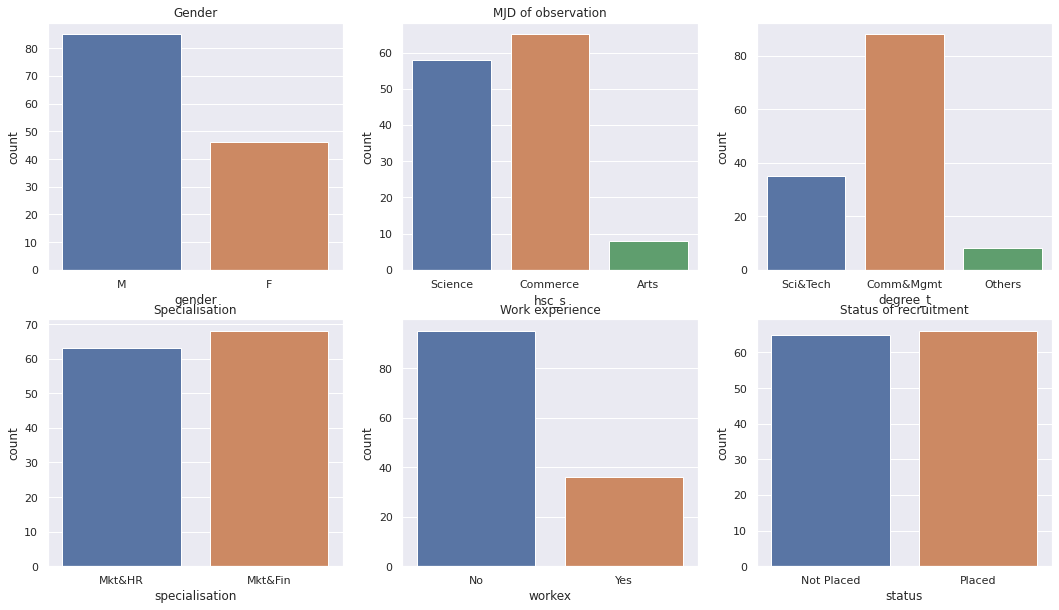

In [ ]:
plt.figure(figsize = (18, 10))

#Gender
plt.subplot(231)
ax=sns.countplot(x="gender", data=df)
ax.set_title('Gender')

#Higher secondary specialisation
plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=df)
ax.set_title('MJD of observation')

#Degree type
plt.subplot(233)
ax=sns.countplot(x="degree_t", data=df)


#Specialisation
plt.subplot(234)
ax=sns.countplot(x="specialisation", data=df)
ax.set_title('Specialisation')

#Work experience
plt.subplot(235)
ax=sns.countplot(x="workex", data=df)
ax.set_title('Work experience')

#Status of recruitment
plt.subplot(236)
ax=sns.countplot(x="status", data=df)
ax.set_title('Status of recruitment')


We have more male candidates than female

We have candidates who did commerce as their hsc course and as well as undergrad
Science background candidates are the second highest in both the cases

Candidates from Marketing and Finance dual specialization are high

Most of our candidates from our dataset don't have any work experience

Most of our candidates from our dataset got placed in a company

## Distribution of our data - Pairplot

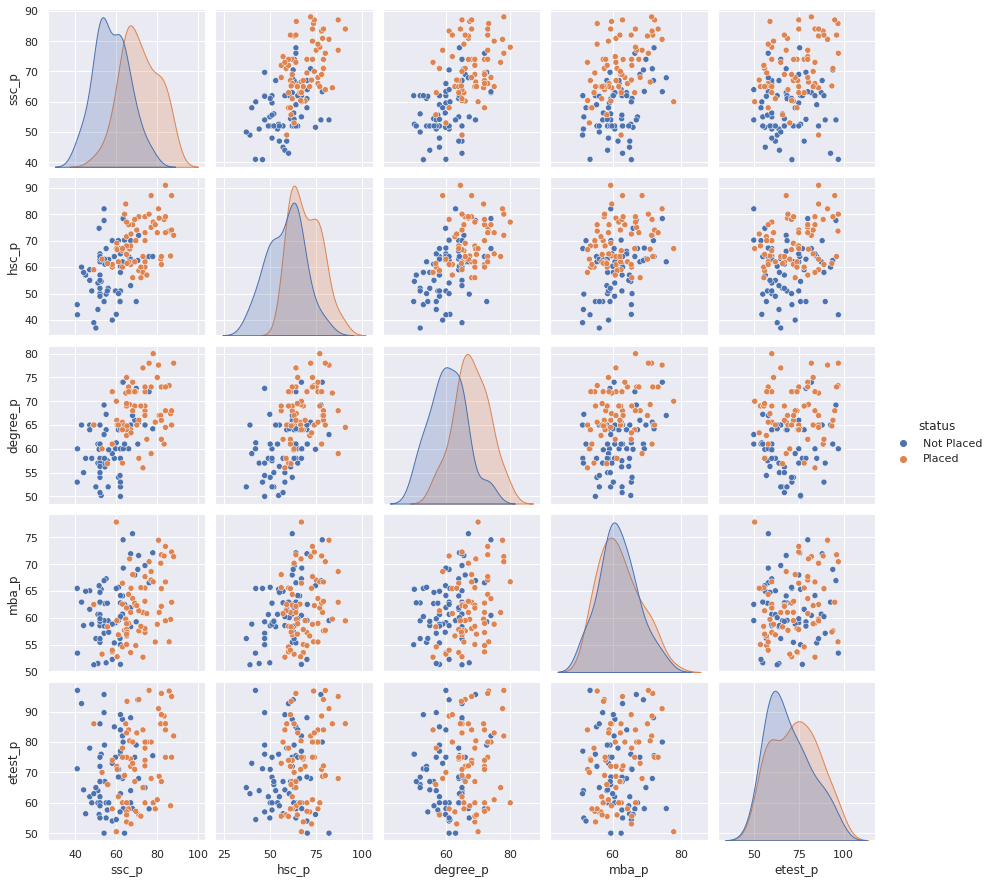

In [ ]:
sns.pairplot(df,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

Candidates who has high score in higher secondary and undergrad got placed

Whomever got high scores in their schools got placed

Comparing the number of students who got placed candidates who got good mba
percentage and employability percentage

##  Distribution Salary- Placed Students

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '')]

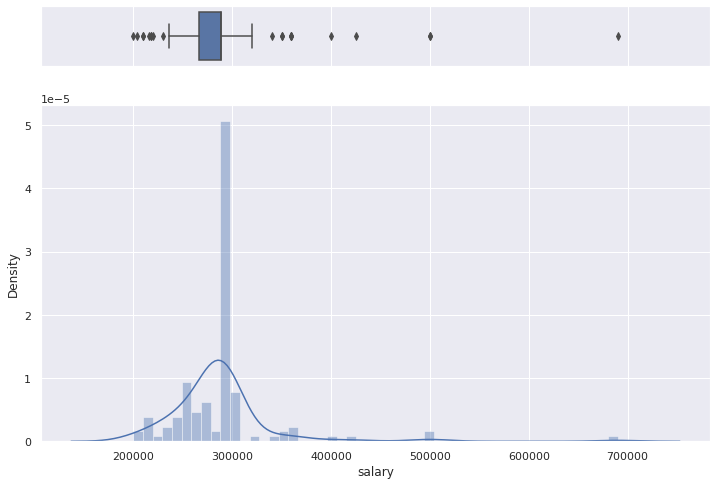

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

data = df[df.salary != 0]
sns.boxplot(df["salary"], ax=ax_box)
sns.distplot(df["salary"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


OBSERVATIONS:
* Many candidates who got placed received package between **2L-4L PA**
* Only **one** candidate got around **10L PA**
* The **average** of the salary is a little more than 2LPA


##  Employability score vs Salary- Joint plot

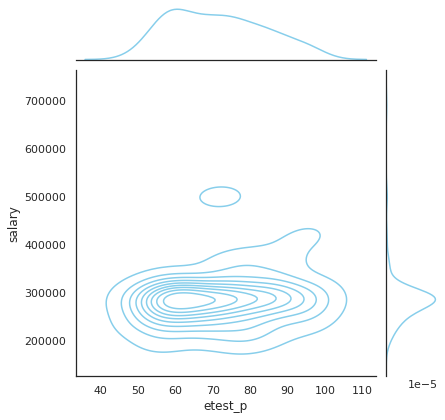

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["etest_p"], y=df["salary"], kind='kde', color="skyblue")

Most of the candidates scored around 60 percentage got a decent package of around 3 lakhs PA

Not many candidates received salary more than 4 lakhs PA

The bottom dense part shows the candidates who were not placed

## Distribution of all percentages

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

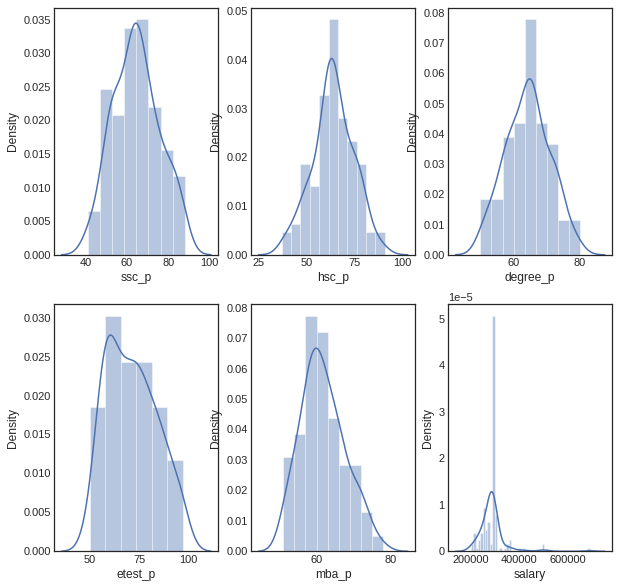

In [ ]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(df['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(df['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(df['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(df['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(df['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(df['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

All the distributions follow normal distribution except salary feature

Most of the candidates educational performances are between 60-80%

Salary distribution got outliers where few have got salary of 7.5L and 10L PA

## Work experience Vs Placement Status

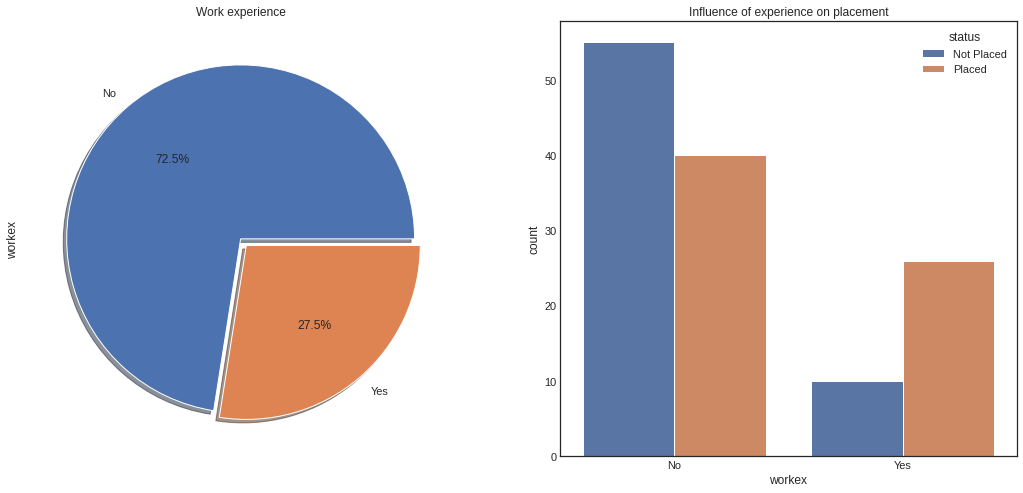

In [ ]:

plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = df)
ax[1].set_title('Influence of experience on placement')
plt.show()

We have nearly 75.4% of candidates who never had any work experience

Candidates who never had work experience have got hired more than the ones who had experience

We can conclude that work experience doesn't influence a candidate in the recruitment process

## MBA marks vs Placement Status- Does your academic score influence?

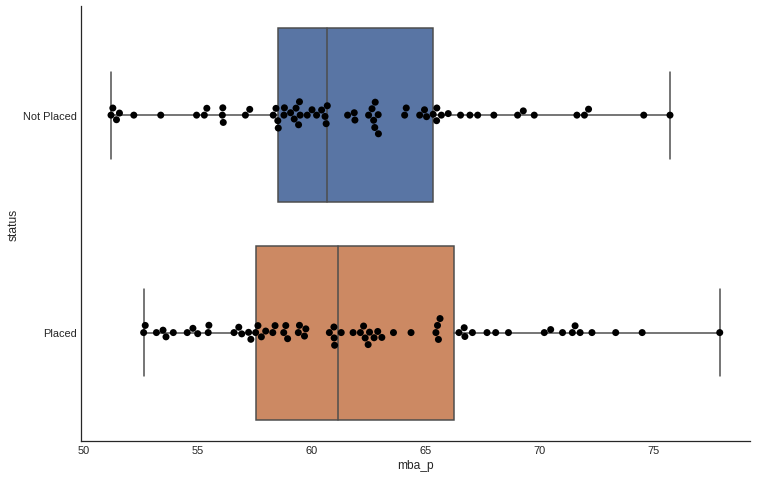

In [ ]:
g = sns.boxplot(y = "status",x = 'mba_p',data = df, whis=np.inf)
g = sns.swarmplot(y = "status",x = 'mba_p',data = df, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

Comparitively there's a slight difference between the percentage scores between both the groups, But still placed candidates still has an upper hand when it comes to numbers as you can see in the swarm. So as per the plot,percentage do influence the placement status

## Is there any gender bias while offering remuneration?

In [ ]:
import plotly.express as px
px.violin(df,y="salary",x="specialisation",color="gender",box=True,points="all")

The top salaries were given to male

The average salary offered were also higher for male

More male candidates were placed compared to female candidates

## Correlation between academic percentages using heatmap

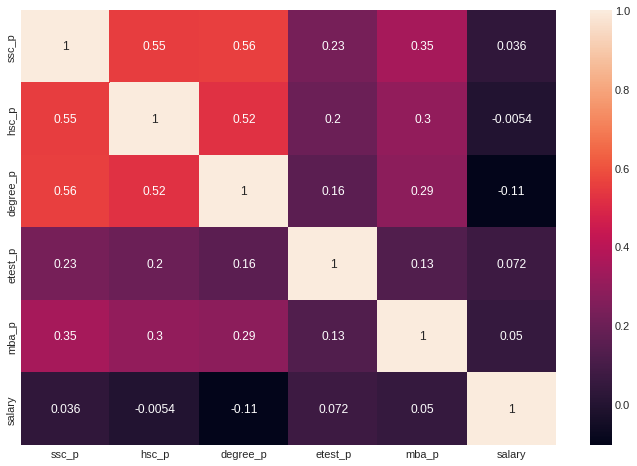

In [ ]:
sns.heatmap(df.corr(),annot=True)

Candidates who were good in their academics performed well throughout school,undergrad,mba and even employability test

These percentages don't have any influence over their salary

## Gender + Undergraduate Degree v/s Employability Test %

In [ ]:
pip install --upgrade plotly

In [ ]:
df_tree_1 = df.copy()
df_tree_1['status'] = df_tree_1['status'].map({'Placed':1, 'Not Placed':0})

In [ ]:
df_tree = df_tree_1.groupby(["gender","degree_t"])[["etest_p"]].mean().reset_index()

fig = px.treemap(df_tree, path=['gender','degree_t'], values='etest_p',
                  color='etest_p', hover_data=['degree_t'],
                  color_continuous_scale='rainbow')
fig.show()

## Gender v/s Salary

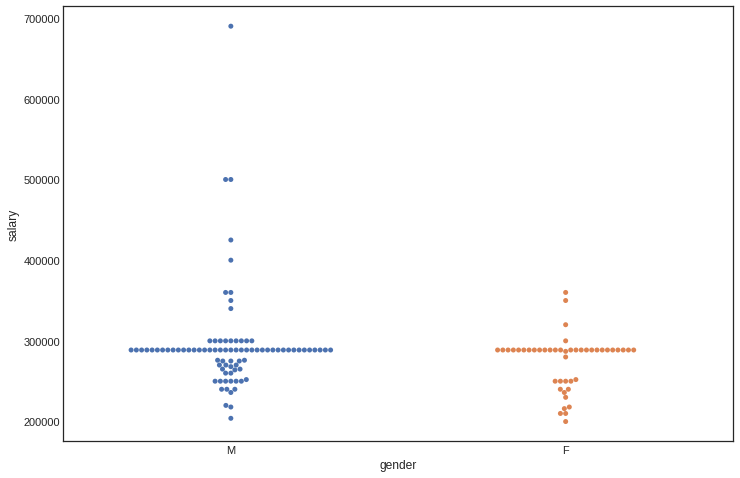

In [ ]:
ax = sns.swarmplot(x="gender", y="salary", data= df)

## Gender + Degree% v/s Count of Status(# placed/not-placed)

In [ ]:
fig = px.histogram(df, x="degree_p", y="status", color="gender")
fig.show()

## Trendline

## Degree% v/s Salary

In [ ]:
fig = px.scatter(df, x="degree_p", y="salary", trendline="ols")
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Employability Test % v/s Salary

In [ ]:
fig = px.scatter(df, x="etest_p", y="salary", trendline="ols")
fig.show()

In [ ]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
5,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,288655.405405
9,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.0,Mkt&Fin,52.21,Not Placed,288655.405405
12,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.0,Mkt&HR,65.04,Not Placed,288655.405405
14,M,62.0,Central,47.0,Central,Commerce,50.00,Comm&Mgmt,No,76.0,Mkt&HR,54.96,Not Placed,288655.405405


##  Label Encoding
We are using label encoder function for gender,workex,specialisation,status columns because these cols have 2 types of classes.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','ssc_b','hsc_b','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,1,56.0,0,52.0,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,288655.405405
5,1,55.0,1,49.8,1,Science,67.25,Sci&Tech,1,55.0,0,51.58,0,288655.405405
9,1,58.0,0,70.0,0,Commerce,61.00,Comm&Mgmt,0,54.0,0,52.21,0,288655.405405
12,0,47.0,0,55.0,1,Science,65.00,Comm&Mgmt,0,62.0,1,65.04,0,288655.405405
14,1,62.0,0,47.0,0,Commerce,50.00,Comm&Mgmt,0,76.0,1,54.96,0,288655.405405


##  One hot encoding
We have used dummies function for the columns which has more than two types of classes i.e (hsc_s, degree_t, salary)

In [ ]:
dummy_hsc_s=pd.get_dummies(df['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(df['degree_t'], prefix='dummy')

placement_coded = pd.concat([df,dummy_hsc_s,dummy_degree_t],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
placement_coded.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
3,1,56.0,0,52.0,0,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
5,1,55.0,1,49.8,1,67.25,1,55.0,0,51.58,0,0,0,1,0,0,1
9,1,58.0,0,70.0,0,61.00,0,54.0,0,52.21,0,0,1,0,1,0,0
12,0,47.0,0,55.0,1,65.00,0,62.0,1,65.04,0,0,0,1,1,0,0
14,1,62.0,0,47.0,0,50.00,0,76.0,1,54.96,0,0,1,0,1,0,0


# Assigning the target(y) and predictor variable(X)
Our Target is to find whether the candidate is placed or not. We use rest of the features except 'salary' as this won't contribute in prediction(i.e) In real world scenario, students gets salary after they get placed, so we can't use a future feature to predict something which happens in the present

In [ ]:
X=placement_coded.drop(['status'],axis=1)
y=placement_coded.status

# DATA SPLITTING (80:20)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)


#FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import classification_report
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.79      0.79      0.79        14

    accuracy                           0.78        27
   macro avg       0.78      0.78      0.78        27
weighted avg       0.78      0.78      0.78        27



**88% accurate**. That's really good. Let's check out confusion matrix and see the classification report

### Confusion matrix and Classification report

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[10  3]
 [ 3 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.79      0.79      0.79        14

    accuracy                           0.78        27
   macro avg       0.78      0.78      0.78        27
weighted avg       0.78      0.78      0.78        27



##OBSERVATIONS:
*  The Confusion matrix result is telling us that we have **10+12** correct predictions and **2+2** incorrect predictions.
*  The Classification report reveals that we have **83%** precision which means the accuracy that the model classifier not to label an instance positive that is actually negative and it is important to consider precision value because when you are hiring, you want to **avoid Type I errors at all cost**. They are **culture killers**.In hiring, a false positive is when you THINK an employee is a good fit, but in actuality they’re not.

### ROC Curve
Let's check out the performance of our model through ROC curve

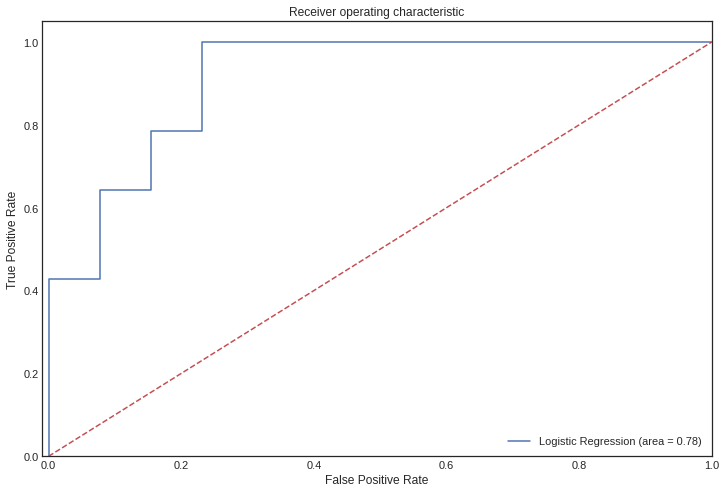

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

##OBSERVATIONS:

From the ROC curve we can infer that our logistic model has classified the placed students correctly rather than predicting false positive. T**he more  the ROC curve(blue) lies towards the top left side the better our model** is. We can choose **0.8 or 0.9** for the threshold value which can reap us true positive results

# Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train);

In [ ]:
pred = model.predict(X_test)

In [ ]:
acc = model.score(X_test,y_test)
print("Accuracy = " + str((acc*100).round(3))+"%")

Accuracy = 44.444%


#Using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

#training
model.fit(X_train,y_train);


In [ ]:
#prediction
pred = model.predict(X_test)
acc = model.score(X_test,y_test)
print("Accuracy = " + str((acc*100).round(3))+"%")


Accuracy = 70.37%


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  3],
       [ 3, 11]])

Text(0.5, 510.88, 'Predicted label')

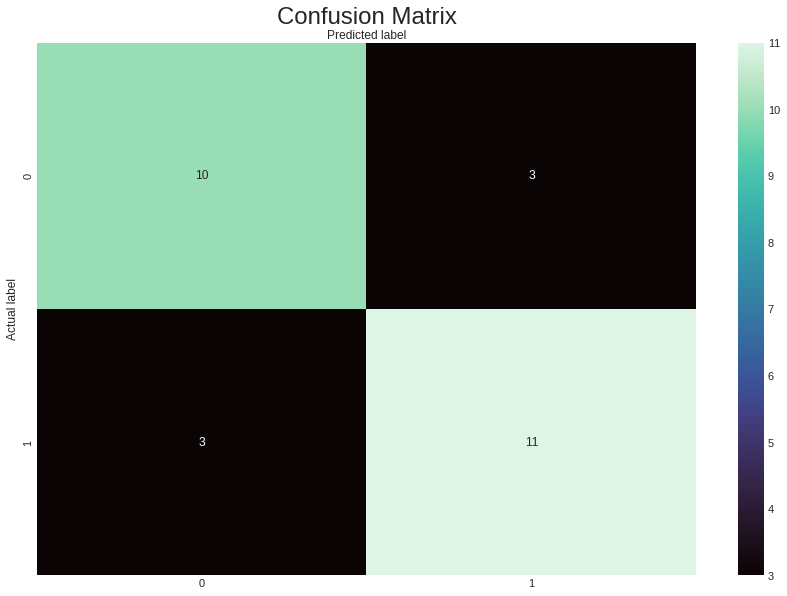

In [ ]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="mako" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1, size = 24)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy = "+ str(((model.score(X_test,y_test))*100).round(3))+"%")

Accuracy = 70.37%


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = model.predict(X_test)

## Validating Performance of Random Forest Model

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  2],
       [ 1, 13]])

Text(0.5, 510.88, 'Predicted label')

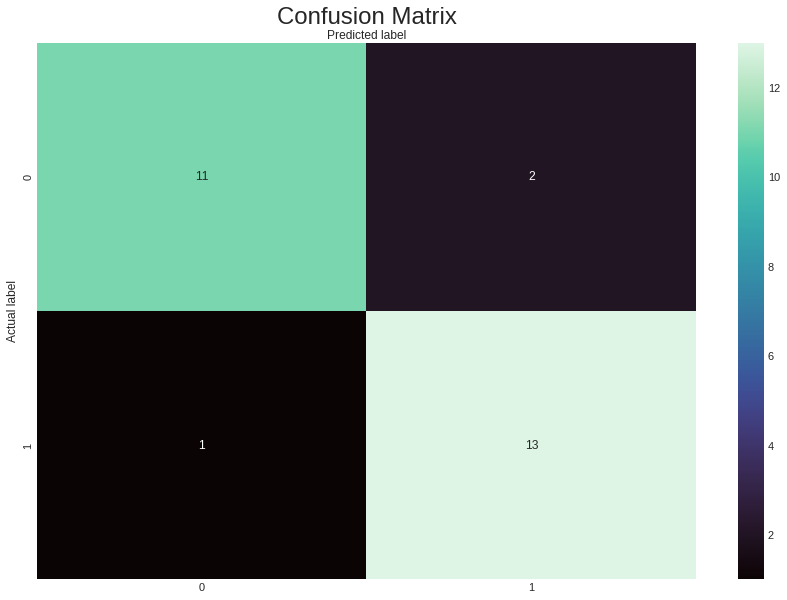

In [ ]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="mako" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1, size = 24)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy = "+ str(((model.score(X_test,y_test))*100).round(3))+"%")

Accuracy = 88.889%


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [ ]:
rfc_cv_score = cross_val_score(model, X_test, y_test, cv=10, scoring='roc_auc')

In [ ]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.87      0.93      0.90        14

    accuracy                           0.89        27
   macro avg       0.89      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27



=== All AUC Scores ===
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  1.0


In [ ]:
from sklearn.metrics import plot_roc_curve

### ROC (Receiver Operating Charateristic) Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



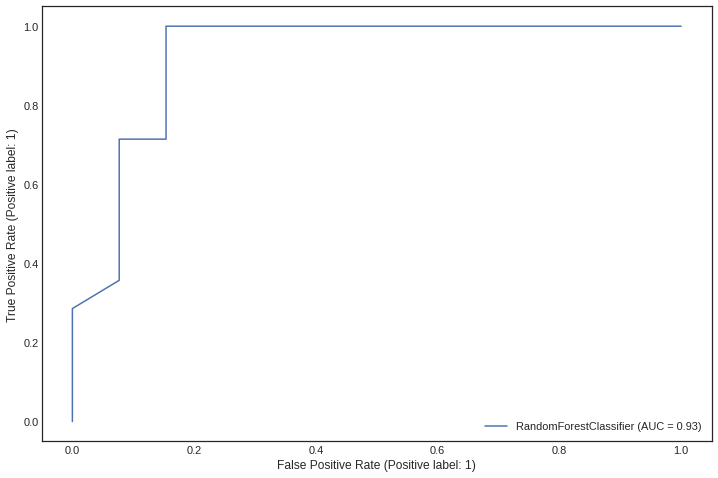

In [ ]:
rfc_ROC_disp = plot_roc_curve(model, X_test, y_test)
plt.show()

# Support Vector Machine Classifier

In [ ]:
from sklearn import svm

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",str(((metrics.accuracy_score(y_test, y_pred))*100).round(3)) + "%")

Accuracy: 88.889%


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8666666666666667
Recall: 0.9285714285714286


#MODEL COMPARISIONS

In [ ]:
from sklearn.metrics import accuracy_score
def evaluator(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(Y_test,Y_pred))
    print('')

In [ ]:
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {
          'Random Forest' : RandomForestClassifier(),
          'Logistic Regression' : LogisticRegression(),
          
          'Naive Bayes':  GaussianNB(),
          'SVM':  svm.SVC(kernel='linear'),
          'Decision Tree' :   DecisionTreeClassifier()
         
      
          
          
          }

for test, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    print( test + ' scores')
    print(acc)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('*' * 100)
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)

Random Forest scores
0.8888888888888888
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.87      0.93      0.90        14

    accuracy                           0.89        27
   macro avg       0.89      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27

[[11  2]
 [ 1 13]]
****************************************************************************************************
Logistic Regression scores
0.7777777777777778
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.79      0.79      0.79        14

    accuracy                           0.78        27
   macro avg       0.78      0.78      0.78        27
weighted avg       0.78      0.78      0.78        27

[[10  3]
 [ 3 11]]
****************************************************************************************************
Naive Bayes scores
0

In [ ]:
Ev=model_accuracy.sort_values(ascending=False, by = 'Train_acc').reset_index()
Ev

,index,Model,Accuracy,Train_acc
0,0,Random Forest,0.888889,1.000000
1,4,Decision Tree,0.851852,1.000000
2,1,Logistic Regression,0.777778,0.875000
3,3,SVM,0.888889,0.855769
4,2,Naive Bayes,0.444444,0.576923


In [ ]:
Ev1=Ev.sort_values(by='Accuracy' ,ascending=False)
Ev1.style.highlight_max(axis=0)

,index,Model,Accuracy,Train_acc
0,0,Random Forest,0.888889,1.000000
3,3,SVM,0.888889,0.855769
1,4,Decision Tree,0.851852,1.000000
2,1,Logistic Regression,0.777778,0.875000
4,2,Naive Bayes,0.444444,0.576923


# ANN for Predicting Placement Status

##LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','ssc_b','hsc_b','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    df_comp[col] = label_encoder.fit_transform(df_comp[col])
df_comp.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.000000
1,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.000000
2,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.000000
3,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,288655.405405
4,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.000000


In [ ]:
#import numpy as np
import tensorflow as tf
from sklearn import preprocessing

In [ ]:
placement_coded.reset_index(drop=True,inplace=True)
X= df_comp[['ssc_p','hsc_p','degree_p','etest_p','mba_p']]
y = df_comp['status']

In [ ]:
X

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,67.00,91.00,58.00,55.0,58.80
1,79.33,78.33,77.48,86.5,66.28
2,65.00,68.00,64.00,75.0,57.80
3,56.00,52.00,52.00,66.0,59.43
4,85.80,73.60,73.30,96.8,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49
211,58.00,60.00,72.00,74.0,53.62
212,67.00,67.00,73.00,59.0,69.72
213,74.00,66.00,58.00,70.0,60.23


In [ ]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [ ]:
#Features
from sklearn.preprocessing import StandardScaler
scFeatures = StandardScaler()
features = scFeatures.fit_transform(X)

In [ ]:
#Train Test Split
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state = 10)

In [ ]:
y_test

78     1
91     0
110    1
124    1
70     1
      ..
68     0
117    1
147    1
162    1
99     0
Name: status, Length: 65, dtype: int64

## Outlining the ANN Model

## The Model

In [ ]:
#early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

ACCURACY_THRESHOLD = 0.90

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
          print("stopping training!!",ACCURACY_THRESHOLD*100)   
          self.model.stop_training = True

callbacks = myCallback()

In [ ]:
#Initialize the Sequential Model
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Reshape((5,), input_shape = (5,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add OUTPUT layer

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#Create optimizer with non-default learning rate
#sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) 

#Compile the model
#model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

#### Early Stopping

In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,batch_size=32,callbacks=callbacks)

Epoch 1/100
5/5 [==============================] - 2s 83ms/step - loss: 0.6049 - accuracy: 0.6467 - val_loss: 0.7161 - val_accuracy: 0.4615
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 0.4594 - accuracy: 0.7733 - val_loss: 0.6969 - val_accuracy: 0.4615
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 0.3876 - accuracy: 0.8533 - val_loss: 0.6534 - val_accuracy: 0.6615
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 0.4220 - accuracy: 0.8400 - val_loss: 0.6344 - val_accuracy: 0.7385
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.3576 - accuracy: 0.8533 - val_loss: 0.6267 - val_accuracy: 0.7231
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 0.3322 - accuracy: 0.8867 - val_loss: 0.6257 - val_accuracy: 0.7231
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.3372 - accuracy: 0.8867 - val_loss: 0.6155 - val_accuracy: 0.6923
Epoch 8/100
5/5 [===

#### Fitting the Data to the Model

In [ ]:
model.save_weights("model.h5")

### Visualising Training

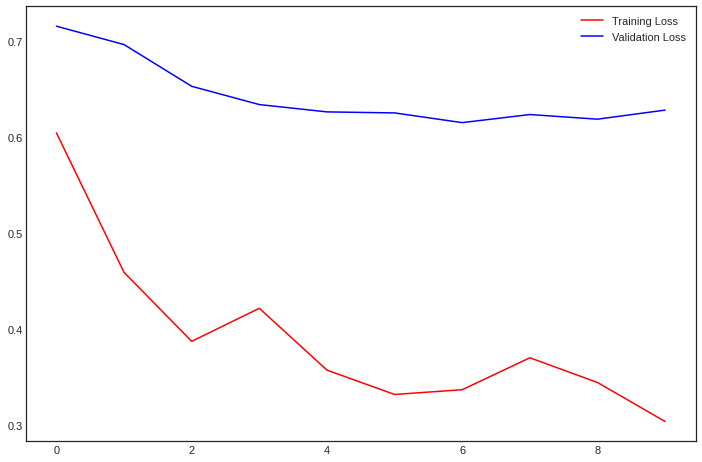

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation Loss')
plt.legend()
plt.show()


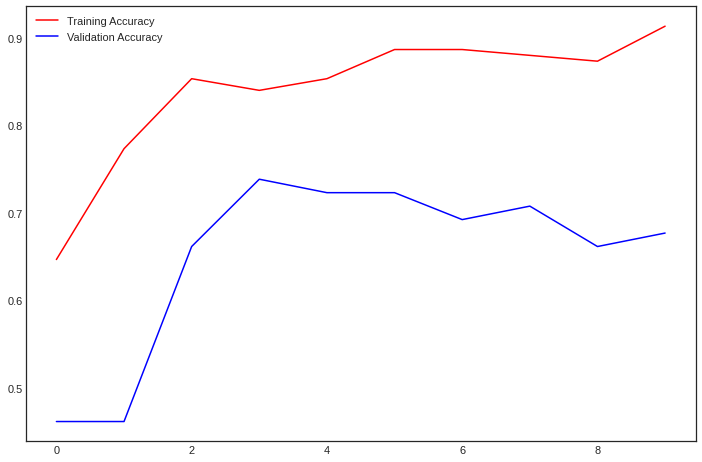

In [ ]:
plt.plot(history.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation Accuracy')
plt.legend()
plt.show()